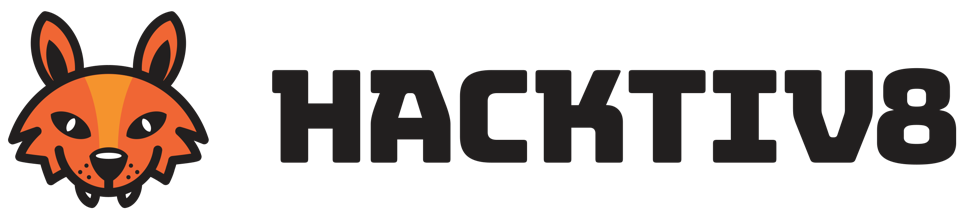

---
# Assignment 1

#### Fadhilah Gustriandini 
---

---
### About Dataset

Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12
---

---
### Preprocessing Dataset

Hal pertama yang akan dilakukan adalah import library yang akan dibutuhkan dalam proses preprocessing dan visualisasi data sebagai berikut:

In [1]:
# Library For DataFrame
import pandas as pd
import numpy as np

# Library for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image
plt.style.use('ggplot')

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

Package folium dan wordcloud tidak tersedia secara default, sehingga harus diinstall terlebih dahulu

In [2]:
!pip install folium

import folium

print('Folium installed and imported!')

Folium installed and imported!


In [3]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


---
### Reading Dataset

Dilakukan load dataset menggunakan pandas

In [4]:
data = pd.read_csv(r"~/datasets/london_crime_by_lsoa.csv")

Akan dilihat 5 baris teratas dari dataset menggunakan fungsi head()

In [5]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Akan dilihat juga 5 baris terbawah dari dataset menggunakan fungsi tail()

In [6]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Gunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


untuk mendapatkan list header kolom dapat menggunakan parameter .columns dataframe

In [8]:
data.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

untuk mendapatkan daftar indeks akan digunakan parameter .index

In [9]:
data.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

Menggunakan parameter .shape untuk melihat dimensi dataframe

In [10]:
data.shape

(13490604, 7)

Gunakan metode isnull(), untuk mengonfirmasi apakah terdapat missing value pada dataset, dimana "NA" akan dikenali sebagai missing value. Jika didapat output True maka terdapat missing value dan jika didapat output False maka tidak terdapat missing value pada dataset

In [11]:
data.isnull()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


Menggunakan .isnull().sum() untuk mengetahui jumlah missing value pada setiap kolom

In [12]:
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

tiap kolom tidak memiliki missing value

---
### Data Visualization
---

---
### Area Plot

##### Tentukan 5 wilayah yang memiliki kriminalitas terendah pada tahun 2008-2016

In [13]:
# menghapus kolom yang tidak diperlukan
kol = ["major_category","minor_category","month"]
least5_crime = data.drop(kol, axis=1)
# set index data
least5_crime = least5_crime.set_index("year").groupby("borough").sum()
least5_crime = least5_crime.sort_values(by="value", ascending=False).tail()

least5_crime

,value
borough,
Bexley,114136
Sutton,100987
Richmond upon Thames,96771
Kingston upon Thames,89306
City of London,780


hasil diatas merupakan 5 wilayah yang memiliki total kriminalitas paling rendah terhitung sejak tahun 2008 - 2016

In [14]:
# menghapus kolom yang tidak diperlukan dan set index
data_least5 = data.drop(kol, axis=1).set_index("borough")
data_least5 = data_least5.loc[least5_crime.index]
data_least5 = pd.pivot_table(data_least5, values="value", 
                         aggfunc=np.sum, index="year", 
                         columns="borough")

data_least5

borough,Bexley,City of London,Kingston upon Thames,Richmond upon Thames,Sutton
year,,,,,
2008,15305,0,10661,11106,12943
2009,14445,0,10163,10618,12240
2010,13166,0,10171,10601,12032
2011,11325,69,10155,10896,11068
2012,11669,157,9956,11168,10948
2013,11552,110,9191,10439,10057
2014,11844,115,9288,10456,10443
2015,11990,151,9738,10413,10598
2016,12840,178,9983,11074,10658


Hasil diatas merupakan jumlah tindak kriminal sepanjang tahun 2008 - 2016 di 5 wilayah dengan kriminalitas terendah

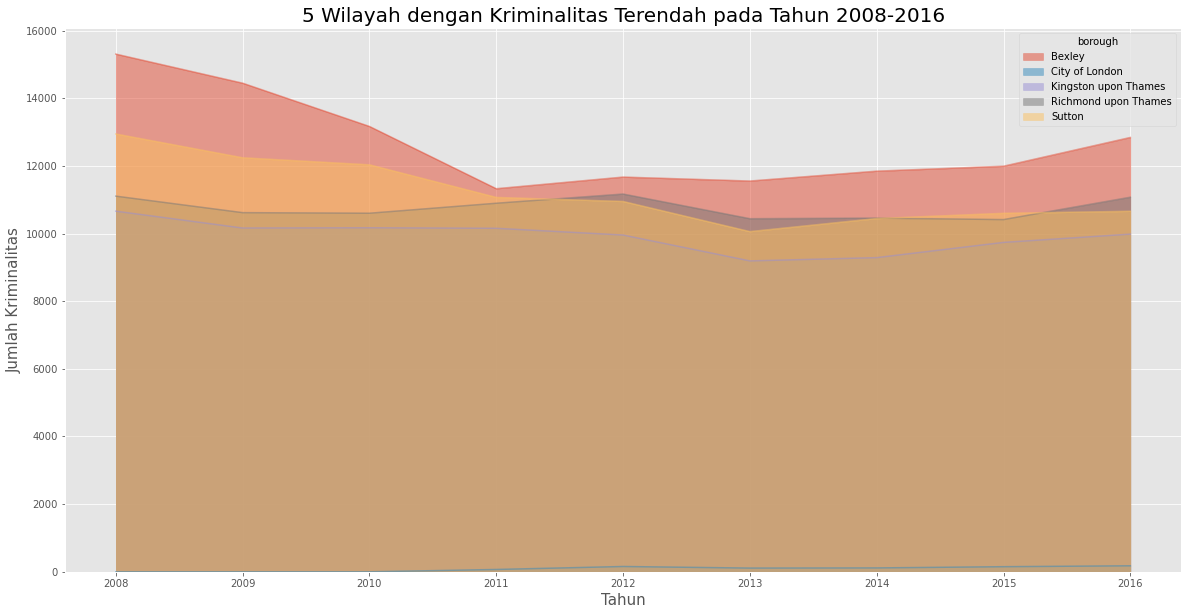

In [15]:
# insiasi area plot
data_least5.plot(kind="area",
             figsize=(20,10),
             stacked=False)

# judul area plot
plt.title("5 Wilayah dengan Kriminalitas Terendah pada Tahun 2008-2016", fontsize=20)
# nama pada xlabel
plt.xlabel("Tahun", fontsize=15)
# nama pada ylabel
plt.ylabel("Jumlah Kriminalitas", fontsize=15)

# menunjukkan plot
plt.show()

<b>Kesimpulan</b>

Kesimpulan yang dapat diambil adalah :
- Terdapat 5 wilayah yang memiliki tindak kriminal rendah yaitu : Bexley, Sutton, Richmond upon Thames, Kingston upon Thames dan City of London
- Wilayah City of London memiliki tindak kriminal yang paling rendah dari wilayah yang lain dengan perbedaan yang  besar.
- Sedangkan 4 wilayah lain  memiliki perbandingan tindak kriminal yang tidak jauh berbeda setiap tahunnya.
- Pada tahun 2008 - 2010, tidak terdapat kriminalitas di wilayah City of London. 
---

---
### Histogram

##### Bagaimana distribusi frekuensi jumlah kriminalitas pada kategori major di London pada tahun 2013

In [16]:
# melihat data 2013
data_2013 = data[data["year"] == 2013]
data_2013.sort_values(['value'], ascending=False, axis=0, inplace=True)
# menunjukkan 5 data teratas
data_2013.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
8783974,E01033595,Westminster,Theft and Handling,Other Theft,196,2013,2
1838888,E01004734,Westminster,Theft and Handling,Other Theft,195,2013,3
5669222,E01004734,Westminster,Theft and Handling,Other Theft,192,2013,2
7401047,E01033595,Westminster,Theft and Handling,Other Theft,192,2013,3
11777679,E01033595,Westminster,Theft and Handling,Other Theft,190,2013,1


In [17]:
#Total Kriminalitas pada ketegori major tahun 2013
data_major_2013 = data_2013.groupby(['major_category']).sum()

#menghapus kolom yang tidak digunakan
data_major_2013.drop(['year', 'month'], axis=1, inplace=True)

data_major_2013.sort_values(['value'], ascending=False, axis=0, inplace=True)
data_major_2013 = data_major_2013

# reset index
data_major_2013.reset_index()

,major_category,value
0,Theft and Handling,306372
1,Violence Against the Person,146181
2,Burglary,87222
3,Criminal Damage,56206
4,Drugs,50278
5,Robbery,29337
6,Other Notifiable Offences,10811
7,Fraud or Forgery,0
8,Sexual Offences,0


In [18]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(data_major_2013)

print(count) # frequency count
print(bin_edges) # bin ranges

[4 2 1 0 1 0 0 0 0 1]
[     0.   30637.2  61274.4  91911.6 122548.8 153186.  183823.2 214460.4
 245097.6 275734.8 306372. ]


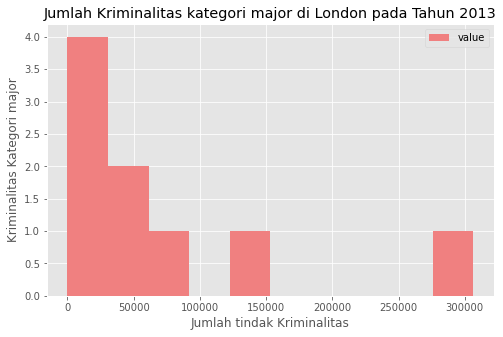

In [19]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(data_major_2013)

# inisiasi plot histogram
data_major_2013.plot(kind='hist', figsize=(8,5), color='lightcoral')

# judul plot
plt.title('Jumlah Kriminalitas kategori major di London pada Tahun 2013')
# nama pada ylabel
plt.ylabel('Kriminalitas Kategori major')
# nama pada xlabel
plt.xlabel('Jumlah tindak Kriminalitas')

# menunjukkan plot
plt.show()

<b>Kesimpulan</b>

- Sebanyak 4 kriminalitas kategori major memiliki frekuensi jumlah tindak kriminal antara 0 - 30637.2
- Sebanyak 2 kriminalitas kategori major memiliki frekuensi jumlah tindak kriminal antara 30637.2 - 61274.4
- Sebanyak 1 kriminalitas kategori major memiliki frekuensi jumlah tindak kriminal antara 61274.4 - 91911.6
- Sebanyak 1 kriminalitas kategori major memiliki frekuensi jumlah tindak kriminal antara 122548.8 - 153186
- Sebanyak 1 kriminalitas kategori major memiliki frekuensi jumlah tindak kriminal antara 275734.8 - 306372


---

---
### Bar Chart

##### Tentukan pada tahun berapakah terjadi tingkat kriminalitas tertinggi dan terendah di London sejak 2008 - 2016

In [20]:
# mengelompokkan data year dan value berdasarkan year
data_london = data[['year', 'value']].groupby(['year']).agg({'value': 'sum'})
# menampilkan 5 data teratas
data_london

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


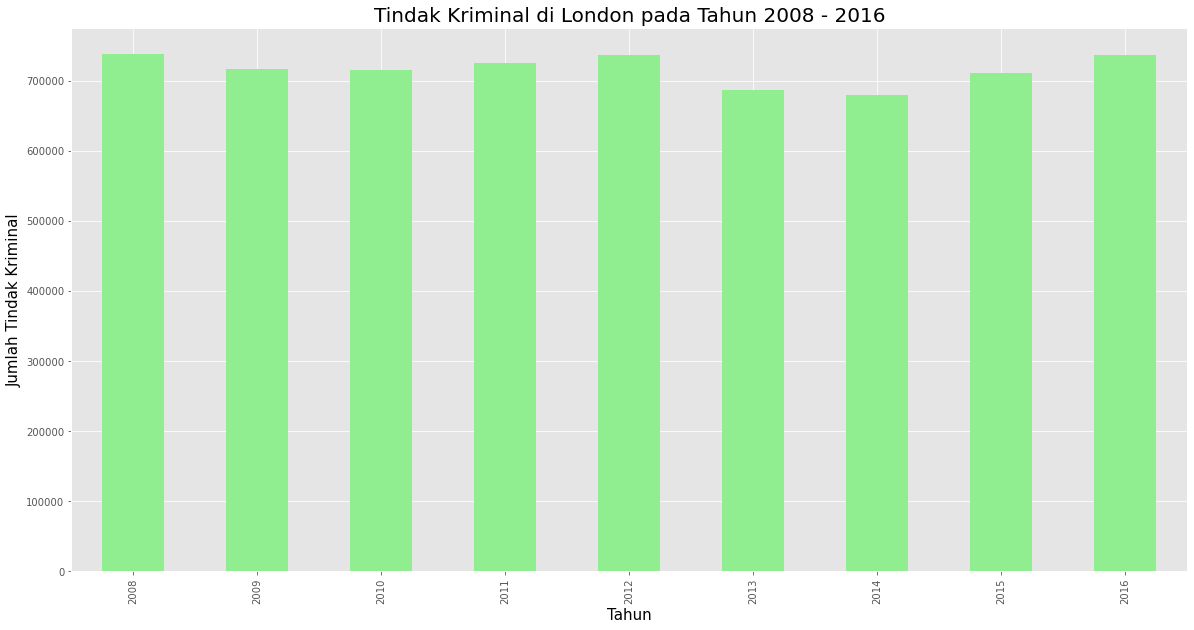

In [21]:
# inisiasi bar chart
data_london.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='lightgreen',
                    legend = False)

# membuat nama judul bar chart
plt.title('Tindak Kriminal di London pada Tahun 2008 - 2016', fontsize = 20)
# membuat nama xlabel
plt.xlabel('Tahun', fontsize = 15, color = "black")
# membuat nama ylabel
plt.ylabel('Jumlah Tindak Kriminal', fontsize = 15, color = "black")

# menampilkan bar chart
plt.show()

<b>Kesimpulan</b>

- Pada tahun 2008 merupakan tahun dimana terjadi kriminalitas tertinggi di London pada periode 2008 - 2016 dengan total kriminalitas sebanyak 738641
- Total kriminalitas paling rendah di London pada periode 2008 -2016 adalah pada tahun 2014 yang berjumlah 680183 tindakan kriminal
---

---
### Pie Chart

##### Berapa persentase 7 wilayah dengan kriminalitas tertinggi pada tahun 2008 - 2016

In [22]:
# menghapus kolom yang tidak diperlukan
kol = ["major_category","minor_category","month"]
top7_crime = data.drop(kol, axis=1)
# set index data
top7_crime = top7_crime.set_index("year").groupby("borough").sum()
top7_crime = top7_crime.sort_values(by="value", ascending=False).head(7)

top7_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


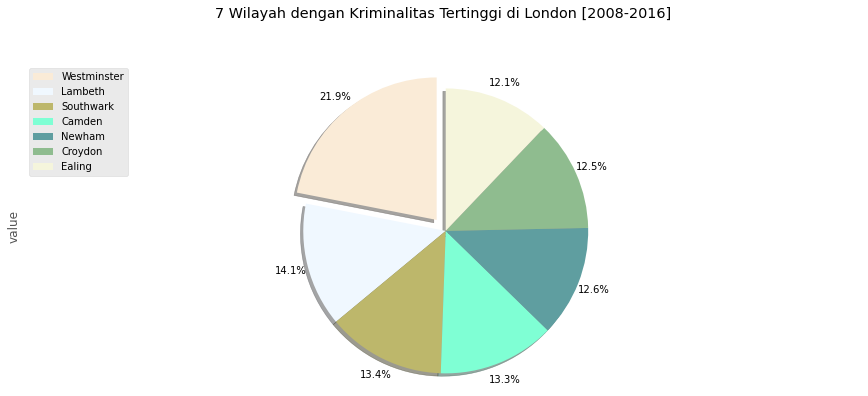

In [23]:
# list warna yang akan digunakan pada pie chart
colors_list = ['antiquewhite', 'aliceblue', 'darkkhaki', 'aquamarine', 'cadetblue', 'darkseagreen', 'beige']
# jarak antar data pada pie chart
explode_list = [0.1, 0, 0, 0, 0, 0, 0]

# inisiasi pie chart
top7_crime.plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
                labels=None,
                subplots=True,
               pctdistance=1.12,
               colors=colors_list,
               explode=explode_list
               )

# judul plot
plt.title('7 Wilayah dengan Kriminalitas Tertinggi di London [2008-2016]', y=1.12)
plt.axis('equal')
plt.legend(labels=top7_crime.index, loc='upper left')

# menunjukkan chart
plt.show()

<b>Kesimpulan</b>

Dari pie chart dengan persentase diatas, didapat urutan dari 7 wilayah di London dengan jumlah kriminalitas dari tinggi ke rendah adalah sebagai berikut :
1. Westminster dengan persentase 21.9%
2. Lambeth dengan persentase 14.1%
3. Southwark dengan persentase 13.4%
4. Camden dengan persentase 13.3%
5. Newham dengan persentase 12.6%
6. Croydon dengan persentase 12.5%
7. Ealing dengan persentase 12.1%

Perbedaan persentase dari wilayah ke2 sampai ke7 tidak terlalu besar, tetapi dari wilayah urutan pertama yaitu Westminster ke urutan selanjutnya memliki perbedaan yang cukup besar

---

---
### Box Plot

##### Bagaimana distribusi statistik dari data jumlah tindak kriminal di wilayah Westminster pada tahun 2008 - 2016

In [24]:
# menunjukkan data di wilayah Westminster
data_borough_Westminster = data[data["borough"] == 'Westminster']
data_borough_Westminster.sort_values(['value'], ascending=False, axis=0, inplace=True)
# menunjukkan 5 data teratas
data_borough_Westminster.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12


In [25]:
# mengelompokkan data year dan value berdasarkan year
data_crime_Westminster = data_borough_Westminster[['year', 'value']].groupby(['year']).agg({'value': 'sum'})
# reset index
data_crime_Westminster.reset_index()

,year,value
0,2008,47846
1,2009,48456
2,2010,48116
3,2011,54243
4,2012,59226
5,2013,53852
6,2014,47564
7,2015,47395
8,2016,48330


In [26]:
# Menampilkan statistika deskriptif dari data
data_crime_Westminster.describe()

,value
count,9.000000
mean,50558.666667
std,4201.683918
min,47395.000000
25%,47846.000000
50%,48330.000000
75%,53852.000000
max,59226.000000


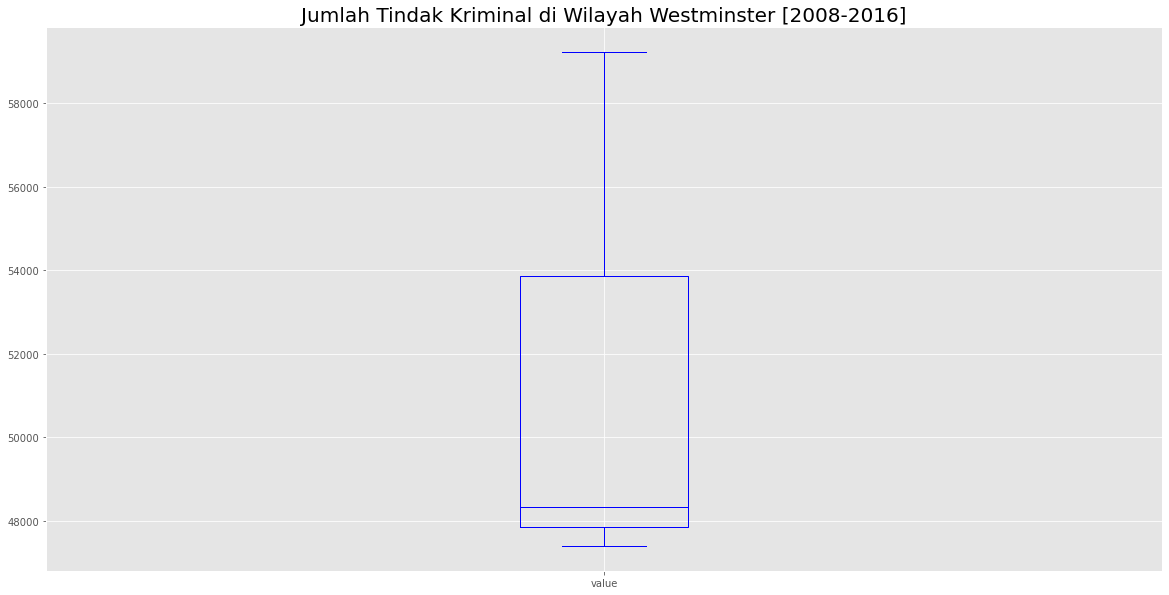

In [27]:
# inisiasi box plot
data_crime_Westminster.plot(kind="box",
                figsize=(20,10),
                color = "blue"
                )

# membuat nama judul box plot
plt.title("Jumlah Tindak Kriminal di Wilayah Westminster [2008-2016]", fontsize=20)

#menampilkan box plot
plt.show()

<b>Kesimpulan</b>

Jumlah tindak kriminalitas di wilayah Westminster pada periode 2008 - 2016 berkisar diantara 47395 hingga 59226 dengann rata - rata 50558.666667.

---

---
### Scatter Plot

##### Bagaimana persebaran total kriminalitas di wilayah Westminster pada Tahun 2008

In [28]:
# melihat data 2008
data_2008 = data[data["year"] == 2008]
data_2008.sort_values(['value'], ascending=False, axis=0, inplace=True)
# menampilkan 5 data teratas
data_2008.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
7930489,E01004734,Westminster,Theft and Handling,Other Theft,254,2008,2


In [29]:
# melihat data pada wilayah Westminster
data_Westminster = data_2008[data_2008["borough"] == 'Westminster']
data_Westminster.sort_values(['value'], ascending=False, axis=0, inplace=True)
# Menampilkan 5 data teratas
data_Westminster.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
7930489,E01004734,Westminster,Theft and Handling,Other Theft,254,2008,2


In [30]:
# menghapus kolom yang tidak diperlukan
kol2 = ["borough","major_category","minor_category"]
data_fin = data_Westminster.drop(kol2, axis=1).set_index("year")

# set index
data_fin = data_fin.reset_index().drop("year", axis=1)
data_fin = data_fin.groupby("month").sum()
data_fin = data_fin.reset_index()

data_fin

,month,value
0,1,3957
1,2,3880
2,3,3896
3,4,3725
4,5,3849
5,6,3853
6,7,4440
7,8,4193
8,9,3557
9,10,4190


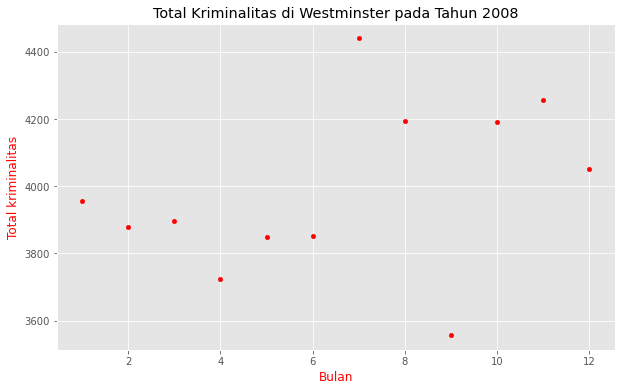

In [31]:
# inisiasi scatter plot
data_fin.plot(kind='scatter', x='month', y='value', figsize=(10,6), color='red')

# membuat judul
plt.title('Total Kriminalitas di Westminster pada Tahun 2008')
# membuat nama xlabel
plt.xlabel('Bulan', color='red')
# membuat nama ylabel
plt.ylabel('Total kriminalitas', color='red')

# menampilkan plot
plt.show()

<b>Kesimpulan</b>

Pada bulan ketujuh atau bulan Juli 2008 merupakan bulan dimana terjadinya kriminalitas tertinggi di Westminster pada tahun 2008 dengan total kriminalitas sebanyak 4440. Sedangkan total kriminalitas paling rendah di Westminster pada tahun 2008 adalah pada bulan September dengan jumlah kriminalitas sebesar 3557. Sejak bulan Januari 2008 - Juni 2008, total kriminalitas berada pada jumlah kurang dari 4000, dan pada bulan Juli 2008 - Desember 2008, total kriminalitas berada pada jumlah lebih dari 4000 kecuali pada bulan September

---

---
### Wordclouds

##### Tindakan kriminalitas tingkat minor apa yang paling sering terjadi di wilayah Lambeth pada tahun 2008-2016

In [32]:
# menggunakan set untuk menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

# inisiasi objek wordcloud
data_minor_wc = WordCloud(background_color='white',
                 max_words=2000,
                 stopwords=stopwords)

In [33]:
# membuat kolom word dari kolom minor_category
data["word"] = data['minor_category']
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,word
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,Burglary in Other Buildings
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,Other violence
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,Other violence
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,Burglary in Other Buildings
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,Personal Property


In [34]:
# total data minor_category
data_minor = data.groupby(['minor_category']).sum()

#menghapus kolom yang tidak digunakan
data_minor.drop(['year', 'month'], axis=1, inplace=True)

data_minor.sort_values(['value'], ascending=False, axis=0, inplace=True)
data_minor = data_minor

# reset index
data_minor.reset_index()

,minor_category,value
0,Other Theft,980085
1,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
3,Harassment,458124
4,Assault with Injury,451001
5,Possession Of Drugs,431948
6,Common Assault,413690
7,Theft From Shops,345142
8,Other Theft Person,308842
9,Criminal Damage To Motor Vehicle,265463


In [35]:
# menggunakan word dari wilayah Lambeth
words="  ".join(word for word in data[data['borough']=='Lambeth'].word)
# generate wordcloud
data_minor_wc.generate(words)

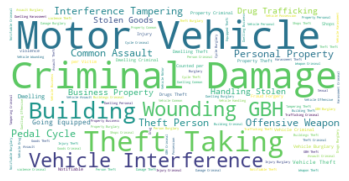

In [36]:
# menunjukkan wordcloud
plt.imshow(data_minor_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<b>Kesimpulan</b>

Berdasakan wordcloud diatas dengan cara melihat tulisan yang terbesar, maka tindak kriminalitas kategori minor yang banyak terjadi di wilayah Lambeth periode 2008 -2016 adalah criminal damage, motor vehicle, theft taking, Wounding GBH, vehicle interference

---

---
### Folium Maps

##### Implementasi peta London menggunakan Folium

In [37]:
# set latitude dan longitude
latitude = 51.509865
longitude = -0.118092

In [38]:
# inisiasi peta london
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

london_map

<b>Kesimpulan</b>

Peta diatas merupakan peta dari london yang ditunjukkan menggunakan folium map

---